In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "tvae"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.044045,0.050680,-0.035571,-0.021783,-0.068923,-0.015407,0.022724,-0.036899,-0.026265,-0.019356,44.0
1,0.034801,0.050680,0.026160,-0.028545,-0.063800,-0.041069,-0.014740,-0.009980,0.073888,-0.003714,145.0
2,0.030936,0.050680,-0.014937,-0.052695,-0.007321,-0.015685,-0.051153,-0.007189,-0.045525,0.016437,83.0
3,0.026655,-0.044642,-0.067558,-0.028630,0.009027,-0.014918,-0.039134,-0.005159,0.071539,0.073977,157.0
4,-0.038688,-0.044642,-0.048899,0.009493,-0.019908,-0.020076,-0.059705,-0.008740,-0.030352,0.010059,123.0
5,0.042884,-0.044642,0.071922,-0.020471,0.025832,0.039165,-0.005184,-0.001957,0.084781,0.038611,233.0
6,-0.015291,-0.044642,-0.005476,-0.021273,-0.014131,-0.027848,0.050345,-0.035473,-0.027806,-0.009146,66.0
7,0.069151,-0.044642,0.105007,0.067863,0.014067,-0.028421,-0.023716,-0.000682,0.047758,0.042603,301.0
8,0.021753,-0.044642,-0.042226,-0.063285,-0.065677,-0.046547,0.049953,-0.035798,-0.086571,-0.053022,66.0
9,-0.021983,-0.044642,0.002549,0.010333,-0.031139,-0.010555,0.054840,-0.044990,-0.126097,-0.058749,53.0


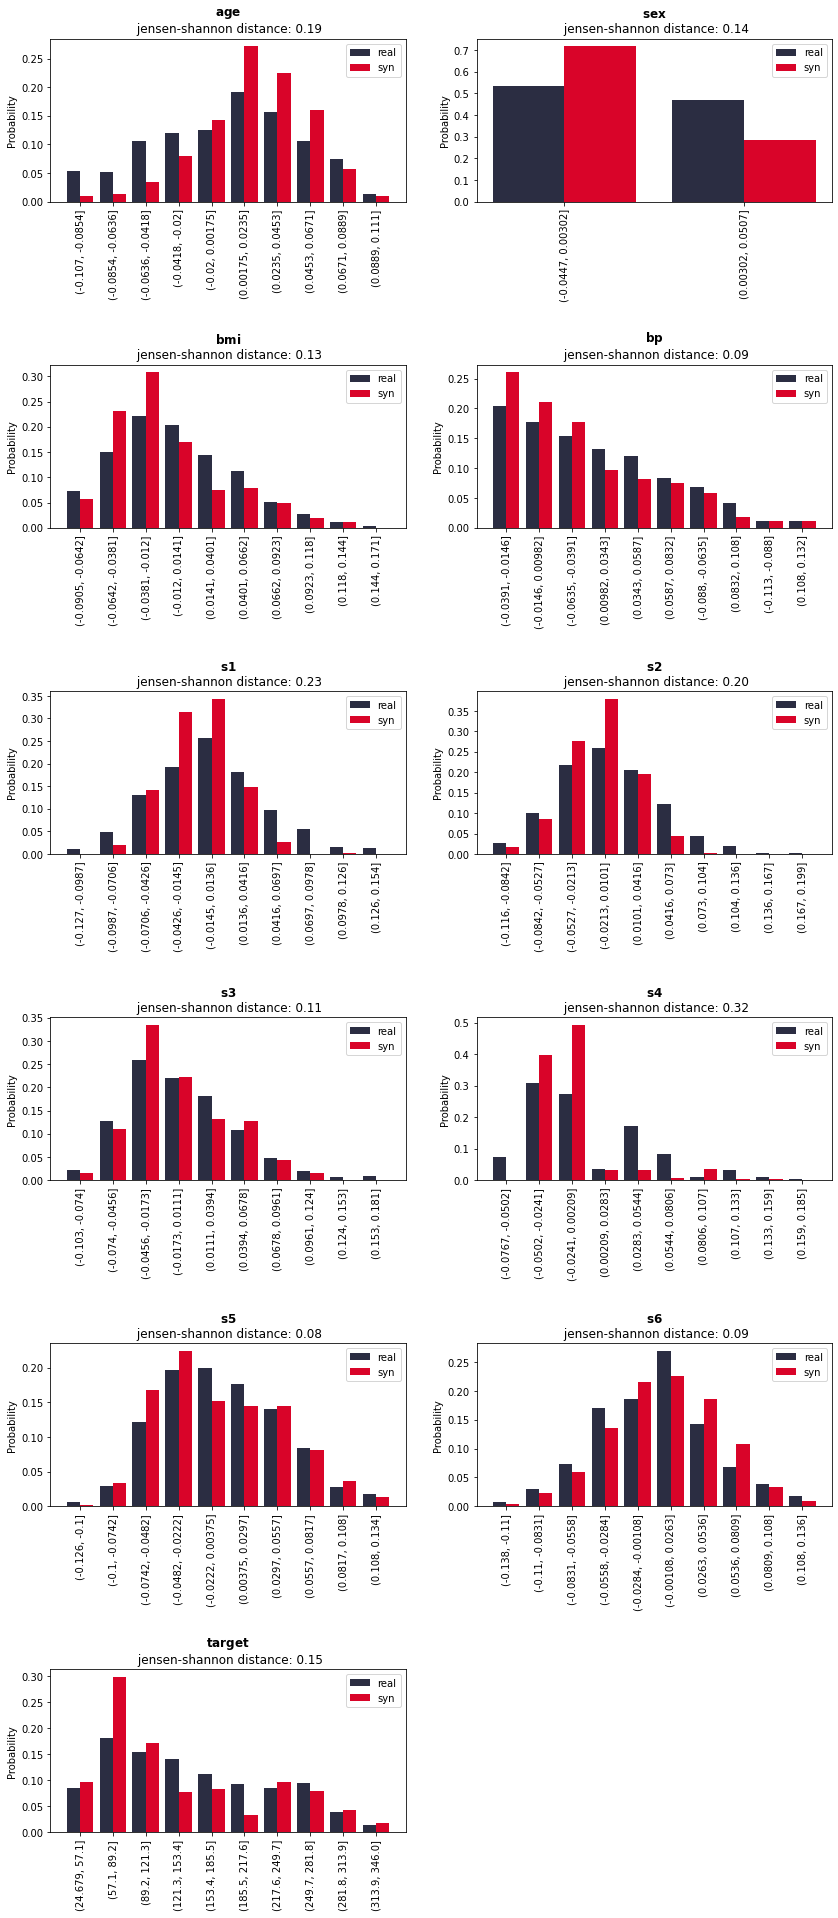

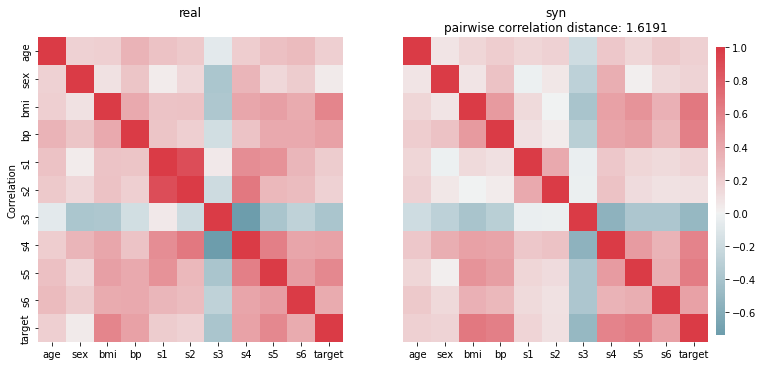

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : tvae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.054477,0.071260,0.065509,0.007803,0.070791,0.008391,3,0,0.01
sanity.inlier_probability,0.929864,0.970588,0.945701,0.017814,0.936652,0.020362,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003771,0.001067,0.004525,0.001131,3,0,0.01
statistical.marginal.jensenshannon_distance,0.133497,0.180165,0.154115,0.019436,0.148682,0.023334,3,0,0.18
statistical.marginal.chi_squared_test,0.348766,0.607708,0.491879,0.107459,0.519165,0.129471,3,0,0.02
statistical.joint.feature_correlation,1.634647,1.733327,1.679562,0.040769,1.670711,0.049340,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.169728,0.178831,0.173996,0.003738,0.173431,0.004551,3,0,4.05
statistical.marginal.inverse_kl_divergence,0.744740,0.835630,0.787060,0.037368,0.780811,0.045445,3,0,0.03
